**Decision trees** are supervised learning algorithms used for both, classification and regression tasks where we will concentrate on classification in this first part of our decision tree tutorial.

Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning. We can use decision trees for issues where we have continuous but also categorical input and target features.

The main idea of decision trees is to find those  **descriptive**  which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible --> The descriptive feature which leaves the target feature most purely is said to be the most informative one. This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so called leaf nodes.

The leaf nodes contain the predictions we will make for new query instances presented to our trained model. This is possible since the model has kind of learned the underlying structure of the training data and hence can, given some assumptions, make predictions about the target feature value (class) of unseen query instances.

A decision tree mainly contains of a root node, interior nodes, and leaf nodes which are then connected by branches.

![](https://python-course.eu/images/machine-learning/Decision_Tree1_500w.webp)

![](https://python-course.eu/images/machine-learning/Categorical_Continuous_Scales_600w.webp)

![](https://chris-said.io/assets/2020_cross_entropy/cross-entropy.png)

In [4]:
from math import log2
def cross_entropy(p,q):
  return -sum( [    p[i]*log2(  q[i]  )     for i in range( len(p))] )

p=[0.10,0.40,0.50]
q=[0.80,0.15,0.05]
events=['red','green','blue']
print("P= %0.3f Q=%0.3f" % ( sum(p), sum(q)) )

P= 1.000 Q=1.000


<BarContainer object of 3 artists>

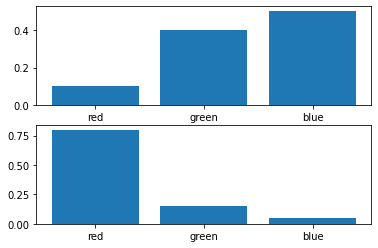

In [6]:
from matplotlib import pyplot as plt
plt.subplot(2,1,1)
plt.bar(events,p)


plt.subplot(2,1,2)
plt.bar(events,q)


In [7]:
cepq=cross_entropy(p,q)
print('H(P,Q):%.3f ' % cepq)

H(P,Q):3.288 


In [8]:
ceqp=cross_entropy(q,q)
print('H(Q,P):%.3f ' % ceqp)

H(Q,P):0.884 


**1. Present a dataset containing of a number of training instances characterized by a number of descriptive features and a target feature**

**2. Train the decision tree model by continuously splitting the target feature along the values of the descriptive features using a measure of information gain during the training process**

**3. Grow the tree until we accomplish a stopping criteria --> create leaf nodes which represent the predictions we want to make for new query instances**


**4. Show query instances to the tree and run down the tree until we arrive at leaf nodes**

**5. DONE - Congratulations you have found the answers to your questions**




![](https://python-course.eu/images/machine-learning/Train_Predict_simplified_720w.webp)

**The C5.0 Decision Tree Algorithm
While there are numerous implementations of decision trees, one of the most well-known is the C5.0 algorithm. The C5.0 algorithm has become the industry standatd for producing decision trees, because it does well fo rmost types of problems directly out of the box. Compared to more advanced and sophisticated machine learning mnodels (e.g. Neural Networks and Support Vector Machines), the decision trees under the C5.0 algorithm generally perform nearly as well but are much easier to understan and deploy.**

Choosing the Best Split
The first main challenge that a decision tree will face is to identify which feature to split upon. If the segements of the data contain only a single class, tehy are considered pure.

https://rpubs.com/cyobero/C50
C5.0 uses the concept of entropy for measuring purity. The entropy of a sample of data indicates how mixed the class values are; the minimum value of 0 indicates that the sample is completely homogenous, while 1 indicates the maximum amount of disorder. The defintion of entropy can be specified as

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTuvsjMg367MgnubB5tWuM1GkbKJvPPCTF8-A&usqp=CAU)



In equation 1, for a given segment of data (S), the term c refers to the number of differenct class levels, and pi refers to the proportion of values falling into the cass level i. For example, if we suppose we have a partiition of data with two classes: red (60 percent) and white (40 percent), we can calculate its entropy as

**−0.6×log20.6−0.4×log20.4=0.9709506**

![](https://www.snippetnuggets.com/interviewQuestions/machineLearning/basics/images/measure-entropy-decision-tree.png)

![](https://www.saedsayad.com/images/Entropy_2.png)

1. Iterative Dichotomiser 3 (ID3)
This algorithm is used for selecting the splitting by calculating information gain. Information gain for each level of the tree is calculated recursively.

2. C4.5
This algorithm is the modification of the ID3 algorithm. It uses information gain or gain ratio for selecting the best attribute. It can handle both continuous and missing attribute values.

In [ ]:
import numpy as np
import pandas as pd
from math import log, e

import timeit

def entropy1(labels, base=None):
  vc = pd.Series(labels).value_counts(normalize=True, sort=False)
  base = e if base is None else base
  return -(vc * np.log(vc)/np.log(base)).sum()

def entropy(labels, base=None):
  value,counts = np.unique(labels, return_counts=True)
  norm_counts = counts / counts.sum()
  base = e if base is None else base
  return -(norm_counts * np.log(norm_counts)/np.log(base)).sum()

labels = [1,3,5,2,3,5,3,2,1,3,4,5]

print(entropy1(labels))

1.5171063970610277


In [ ]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
from sklearn import tree

In [ ]:
iris=load_iris()
print(iris.feature_names) 

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


Remove the Labels
Now, we will remove the elements in the 0th, 50th, and 100th position. 0th element belongs to the Setosa species, 50th belongs Versicolor species and the 100th belongs to the Virginica species.

This will remove the labels for us to train our decision tree classifier better and check if it is able to classify the data well.

In [ ]:
#Spilitting the dataset
removed =[0,50,100]
new_target = np.delete(iris.target,removed)
new_data = np.delete(iris.data,removed, axis=0) 

In [ ]:
#train classifier
clf = tree.DecisionTreeClassifier() # defining decision tree classifier
clf=clf.fit(new_data,new_target) # train data on new data and new target
prediction = clf.predict(iris.data[removed]) #  assign removed data as input


In [ ]:
print("Original Labels",iris.target[removed])
print("Labels Predicted",prediction)

Original Labels [0 1 2]
Labels Predicted [0 1 2]


[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 147\nvalue = [49, 49, 49]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 49\nvalue = [49, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 98\nvalue = [0, 49, 49]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.171\nsamples = 53\nvalue = [0, 48, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.042\nsamples = 47\nvalue = [0, 46, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 46\nvalue = [0, 46, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini =

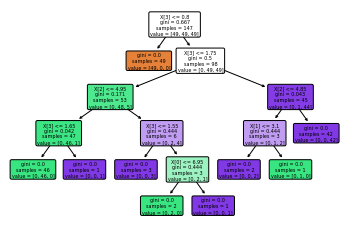

In [ ]:

tree.plot_tree(clf,filled=True, rounded=True) 